# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 17237 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 17237) |                   | Elapsed Time: 0:00:04 ETA:  20:29:59

  0% (   99 of 17237) |                    | Elapsed Time: 0:00:05 ETA:  0:02:51

  1% (  188 of 17237) |                    | Elapsed Time: 0:00:06 ETA:  0:02:58

  1% (  216 of 17237) |                    | Elapsed Time: 0:00:06 ETA:  0:02:57

  1% (  330 of 17237) |                    | Elapsed Time: 0:00:07 ETA:  0:02:44

  2% (  431 of 17237) |                    | Elapsed Time: 0:00:08 ETA:  0:02:41

  3% (  526 of 17237) |                    | Elapsed Time: 0:00:09 ETA:  0:02:42

  3% (  629 of 17237) |                    | Elapsed Time: 0:00:10 ETA:  0:02:41

  3% (  647 of 17237) |                    | Elapsed Time: 0:00:10 ETA:  0:02:41

  4% (  751 of 17237) |                    | Elapsed Time: 0:00:11 ETA:  0:02:39

  4% (  843 of 17237) |                    | Elapsed Time: 0:00:12 ETA:  0:02:40

  5% (  862 of 17237) |#                   | Elapsed Time: 0:00:12 ETA:  0:02:38

  5% (  946 of 17237) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:41

  6% ( 1045 of 17237) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:43

  6% ( 1078 of 17237) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:47

  6% ( 1170 of 17237) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:47

  7% ( 1264 of 17237) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:49

  7% ( 1293 of 17237) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:49

  7% ( 1351 of 17237) |#                   | Elapsed Time: 0:00:18 ETA:  0:03:03

  8% ( 1440 of 17237) |#                   | Elapsed Time: 0:00:19 ETA:  0:03:03

  8% ( 1509 of 17237) |#                   | Elapsed Time: 0:00:20 ETA:  0:03:03

  9% ( 1592 of 17237) |#                   | Elapsed Time: 0:00:21 ETA:  0:03:03

  9% ( 1669 of 17237) |#                   | Elapsed Time: 0:00:22 ETA:  0:03:09

 10% ( 1724 of 17237) |##                  | Elapsed Time: 0:00:23 ETA:  0:03:10

 10% ( 1800 of 17237) |##                  | Elapsed Time: 0:00:24 ETA:  0:03:15

 10% ( 1882 of 17237) |##                  | Elapsed Time: 0:00:25 ETA:  0:03:18

 11% ( 1940 of 17237) |##                  | Elapsed Time: 0:00:26 ETA:  0:03:17

 11% ( 2017 of 17237) |##                  | Elapsed Time: 0:00:27 ETA:  0:03:09

 12% ( 2106 of 17237) |##                  | Elapsed Time: 0:00:28 ETA:  0:03:08

 12% ( 2155 of 17237) |##                  | Elapsed Time: 0:00:28 ETA:  0:03:06

 13% ( 2246 of 17237) |##                  | Elapsed Time: 0:00:29 ETA:  0:03:02

 13% ( 2326 of 17237) |##                  | Elapsed Time: 0:00:30 ETA:  0:03:00

 13% ( 2371 of 17237) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:56

 14% ( 2477 of 17237) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:45

 15% ( 2586 of 17237) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:35

 15% ( 2678 of 17237) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:30

 16% ( 2765 of 17237) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:29

 16% ( 2802 of 17237) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:28

 16% ( 2896 of 17237) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:26

 17% ( 2966 of 17237) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:36

 17% ( 3017 of 17237) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:38

 17% ( 3090 of 17237) |###                 | Elapsed Time: 0:00:39 ETA:  0:02:48

 18% ( 3171 of 17237) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:56

 18% ( 3232 of 17237) |###                 | Elapsed Time: 0:00:41 ETA:  0:02:59

 19% ( 3298 of 17237) |###                 | Elapsed Time: 0:00:42 ETA:  0:03:08

 19% ( 3379 of 17237) |###                 | Elapsed Time: 0:00:43 ETA:  0:03:09

 20% ( 3448 of 17237) |####                | Elapsed Time: 0:00:44 ETA:  0:03:09

 20% ( 3525 of 17237) |####                | Elapsed Time: 0:00:45 ETA:  0:03:14

 21% ( 3636 of 17237) |####                | Elapsed Time: 0:00:46 ETA:  0:02:50

 21% ( 3663 of 17237) |####                | Elapsed Time: 0:00:46 ETA:  0:02:47

 21% ( 3780 of 17237) |####                | Elapsed Time: 0:00:47 ETA:  0:02:32

 22% ( 3879 of 17237) |####                | Elapsed Time: 0:00:48 ETA:  0:02:24

 23% ( 3983 of 17237) |####                | Elapsed Time: 0:00:49 ETA:  0:02:14

 23% ( 4094 of 17237) |####                | Elapsed Time: 0:00:50 ETA:  0:02:01

 24% ( 4199 of 17237) |####                | Elapsed Time: 0:00:51 ETA:  0:01:55

 24% ( 4277 of 17237) |####                | Elapsed Time: 0:00:52 ETA:  0:01:54

 25% ( 4310 of 17237) |#####               | Elapsed Time: 0:00:53 ETA:  0:01:57

 25% ( 4409 of 17237) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:57

 26% ( 4525 of 17237) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:02

 26% ( 4634 of 17237) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:00

 27% ( 4741 of 17237) |#####               | Elapsed Time: 0:00:57 ETA:  0:01:59

 28% ( 4849 of 17237) |#####               | Elapsed Time: 0:00:58 ETA:  0:01:57

 28% ( 4956 of 17237) |#####               | Elapsed Time: 0:00:59 ETA:  0:01:50

 29% ( 5070 of 17237) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:45

 30% ( 5172 of 17237) |######              | Elapsed Time: 0:01:01 ETA:  0:01:44

 30% ( 5288 of 17237) |######              | Elapsed Time: 0:01:02 ETA:  0:01:41

 31% ( 5387 of 17237) |######              | Elapsed Time: 0:01:03 ETA:  0:01:36

 31% ( 5437 of 17237) |######              | Elapsed Time: 0:01:04 ETA:  0:01:49

 32% ( 5549 of 17237) |######              | Elapsed Time: 0:01:05 ETA:  0:01:47

 32% ( 5603 of 17237) |######              | Elapsed Time: 0:01:05 ETA:  0:01:44

 33% ( 5706 of 17237) |######              | Elapsed Time: 0:01:06 ETA:  0:01:43

 33% ( 5818 of 17237) |######              | Elapsed Time: 0:01:07 ETA:  0:01:45

 34% ( 5922 of 17237) |######              | Elapsed Time: 0:01:08 ETA:  0:01:43

 35% ( 6033 of 17237) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:49

 35% ( 6133 of 17237) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:35

 36% ( 6249 of 17237) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:36

 36% ( 6345 of 17237) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:36

 37% ( 6464 of 17237) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:33

 38% ( 6578 of 17237) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:29

 38% ( 6680 of 17237) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:26

 39% ( 6794 of 17237) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:23

 40% ( 6895 of 17237) |########            | Elapsed Time: 0:01:18 ETA:  0:01:20

 40% ( 7010 of 17237) |########            | Elapsed Time: 0:01:19 ETA:  0:01:19

 41% ( 7111 of 17237) |########            | Elapsed Time: 0:01:20 ETA:  0:01:17

 41% ( 7225 of 17237) |########            | Elapsed Time: 0:01:21 ETA:  0:01:13

 42% ( 7326 of 17237) |########            | Elapsed Time: 0:01:21 ETA:  0:01:12

 43% ( 7437 of 17237) |########            | Elapsed Time: 0:01:22 ETA:  0:01:12

 43% ( 7542 of 17237) |########            | Elapsed Time: 0:01:23 ETA:  0:01:11

 44% ( 7657 of 17237) |########            | Elapsed Time: 0:01:24 ETA:  0:01:10

 45% ( 7757 of 17237) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:11

 45% ( 7871 of 17237) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:11

 46% ( 7973 of 17237) |#########           | Elapsed Time: 0:01:27 ETA:  0:01:10

 46% ( 8087 of 17237) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:10

 47% ( 8188 of 17237) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:08

 47% ( 8271 of 17237) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:13

 48% ( 8404 of 17237) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:09

 49% ( 8508 of 17237) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:10

 49% ( 8554 of 17237) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:20

 50% ( 8619 of 17237) |##########          | Elapsed Time: 0:01:34 ETA:  0:01:23

 50% ( 8734 of 17237) |##########          | Elapsed Time: 0:01:35 ETA:  0:01:19

 51% ( 8834 of 17237) |##########          | Elapsed Time: 0:01:36 ETA:  0:01:19

 51% ( 8935 of 17237) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:19

 52% ( 9050 of 17237) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:16

 53% ( 9168 of 17237) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:11

 53% ( 9265 of 17237) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:11

 54% ( 9377 of 17237) |##########          | Elapsed Time: 0:01:41 ETA:  0:00:56

 55% ( 9481 of 17237) |###########         | Elapsed Time: 0:01:42 ETA:  0:00:57

 55% ( 9587 of 17237) |###########         | Elapsed Time: 0:01:43 ETA:  0:00:58

 56% ( 9696 of 17237) |###########         | Elapsed Time: 0:01:44 ETA:  0:00:55

 56% ( 9795 of 17237) |###########         | Elapsed Time: 0:01:45 ETA:  0:00:56

 57% ( 9888 of 17237) |###########         | Elapsed Time: 0:01:46 ETA:  0:01:01

 57% ( 9912 of 17237) |###########         | Elapsed Time: 0:01:46 ETA:  0:01:00

 58% (10011 of 17237) |###########         | Elapsed Time: 0:01:47 ETA:  0:01:03

 58% (10127 of 17237) |###########         | Elapsed Time: 0:01:48 ETA:  0:01:00

 59% (10225 of 17237) |###########         | Elapsed Time: 0:01:49 ETA:  0:01:01

 60% (10343 of 17237) |############        | Elapsed Time: 0:01:51 ETA:  0:00:58

 60% (10454 of 17237) |############        | Elapsed Time: 0:01:52 ETA:  0:00:55

 61% (10558 of 17237) |############        | Elapsed Time: 0:01:53 ETA:  0:00:51

 61% (10656 of 17237) |############        | Elapsed Time: 0:01:54 ETA:  0:00:51

 62% (10774 of 17237) |############        | Elapsed Time: 0:01:55 ETA:  0:00:50

 63% (10870 of 17237) |############        | Elapsed Time: 0:01:56 ETA:  0:00:51

 63% (10989 of 17237) |############        | Elapsed Time: 0:01:57 ETA:  0:00:52

 64% (11082 of 17237) |############        | Elapsed Time: 0:01:58 ETA:  0:00:53

 64% (11168 of 17237) |############        | Elapsed Time: 0:01:59 ETA:  0:00:58

 65% (11205 of 17237) |#############       | Elapsed Time: 0:01:59 ETA:  0:00:59

 65% (11304 of 17237) |#############       | Elapsed Time: 0:02:00 ETA:  0:00:58

 66% (11420 of 17237) |#############       | Elapsed Time: 0:02:01 ETA:  0:00:56

 66% (11514 of 17237) |#############       | Elapsed Time: 0:02:02 ETA:  0:00:56

 67% (11635 of 17237) |#############       | Elapsed Time: 0:02:04 ETA:  0:00:51

 68% (11748 of 17237) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:45

 68% (11851 of 17237) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:38

 69% (11953 of 17237) |#############       | Elapsed Time: 0:02:06 ETA:  0:00:38

 70% (12066 of 17237) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:36

 70% (12158 of 17237) |##############      | Elapsed Time: 0:02:09 ETA:  0:00:39

 71% (12252 of 17237) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:38

 71% (12282 of 17237) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:39

 71% (12316 of 17237) |##############      | Elapsed Time: 0:02:11 ETA:  0:00:55

 72% (12420 of 17237) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:56

 72% (12497 of 17237) |##############      | Elapsed Time: 0:02:13 ETA:  0:01:04

 73% (12604 of 17237) |##############      | Elapsed Time: 0:02:14 ETA:  0:01:02

 73% (12713 of 17237) |##############      | Elapsed Time: 0:02:15 ETA:  0:01:01

 74% (12822 of 17237) |##############      | Elapsed Time: 0:02:16 ETA:  0:00:55

 75% (12928 of 17237) |###############     | Elapsed Time: 0:02:17 ETA:  0:00:50

 75% (13037 of 17237) |###############     | Elapsed Time: 0:02:18 ETA:  0:00:46

 76% (13144 of 17237) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:28

 76% (13237 of 17237) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:30

 77% (13359 of 17237) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:22

 78% (13476 of 17237) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:17

 78% (13575 of 17237) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:18

 79% (13669 of 17237) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:20

 80% (13790 of 17237) |################    | Elapsed Time: 0:02:25 ETA:  0:00:20

 80% (13892 of 17237) |################    | Elapsed Time: 0:02:26 ETA:  0:00:17

 81% (14006 of 17237) |################    | Elapsed Time: 0:02:27 ETA:  0:00:19

 81% (14121 of 17237) |################    | Elapsed Time: 0:02:28 ETA:  0:00:19

 82% (14221 of 17237) |################    | Elapsed Time: 0:02:29 ETA:  0:00:19

 83% (14316 of 17237) |################    | Elapsed Time: 0:02:30 ETA:  0:00:18

 83% (14406 of 17237) |################    | Elapsed Time: 0:02:31 ETA:  0:00:21

 83% (14436 of 17237) |################    | Elapsed Time: 0:02:32 ETA:  0:00:23

 84% (14527 of 17237) |################    | Elapsed Time: 0:02:33 ETA:  0:00:24

 84% (14613 of 17237) |################    | Elapsed Time: 0:02:34 ETA:  0:00:27

 85% (14652 of 17237) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:27

 85% (14760 of 17237) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:28

 86% (14867 of 17237) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:24

 86% (14954 of 17237) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:25

 87% (15056 of 17237) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:22

 87% (15083 of 17237) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:19

 88% (15195 of 17237) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:14

 88% (15298 of 17237) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:07

 89% (15392 of 17237) |#################   | Elapsed Time: 0:02:41 ETA:  0:00:07

 90% (15514 of 17237) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:07

 90% (15608 of 17237) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:06

 91% (15689 of 17237) |##################  | Elapsed Time: 0:02:45 ETA:  0:00:10

 91% (15729 of 17237) |##################  | Elapsed Time: 0:02:45 ETA:  0:00:10

 91% (15820 of 17237) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:15

 92% (15945 of 17237) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:12

 93% (16045 of 17237) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:09

 93% (16160 of 17237) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:11

 94% (16260 of 17237) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:06

 94% (16349 of 17237) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:03

 95% (16376 of 17237) |################### | Elapsed Time: 0:02:52 ETA:  0:00:05

 95% (16484 of 17237) |################### | Elapsed Time: 0:02:53 ETA:  0:00:00

 96% (16591 of 17237) |################### | Elapsed Time: 0:02:54 ETA:  0:00:01

 96% (16673 of 17237) |################### | Elapsed Time: 0:02:55 ETA:  0:00:05

 97% (16769 of 17237) |################### | Elapsed Time: 0:02:56 ETA:  0:00:07

 97% (16782 of 17237) |################### | Elapsed Time: 0:02:57 ETA:  0:00:30

 97% (16807 of 17237) |################### | Elapsed Time: 0:02:57 ETA:  0:00:36

 97% (16883 of 17237) |################### | Elapsed Time: 0:02:58 ETA:  0:00:41

 98% (16967 of 17237) |################### | Elapsed Time: 0:02:59 ETA:  0:00:37

 98% (17022 of 17237) |################### | Elapsed Time: 0:03:00 ETA:  0:00:48

 99% (17105 of 17237) |################### | Elapsed Time: 0:03:01 ETA:  0:00:54

 99% (17188 of 17237) |################### | Elapsed Time: 0:03:02 ETA:  0:00:50

100% (17237 of 17237) |####################| Elapsed Time: 0:03:02 Time: 0:03:02


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

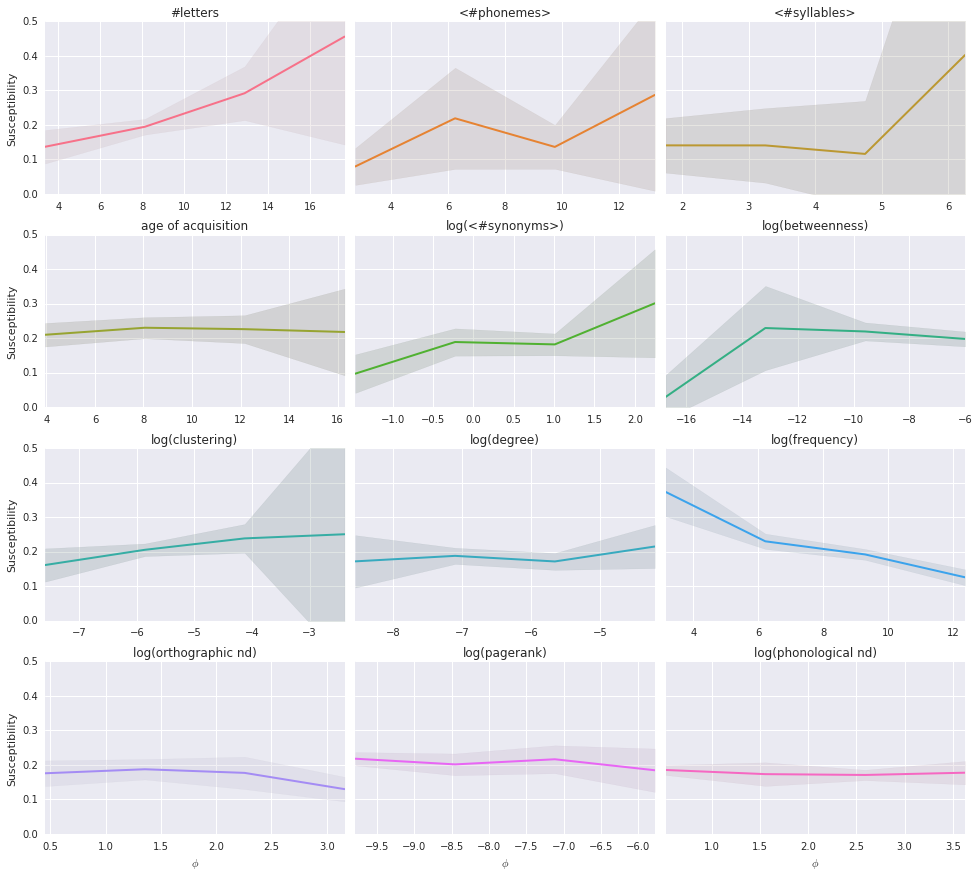

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

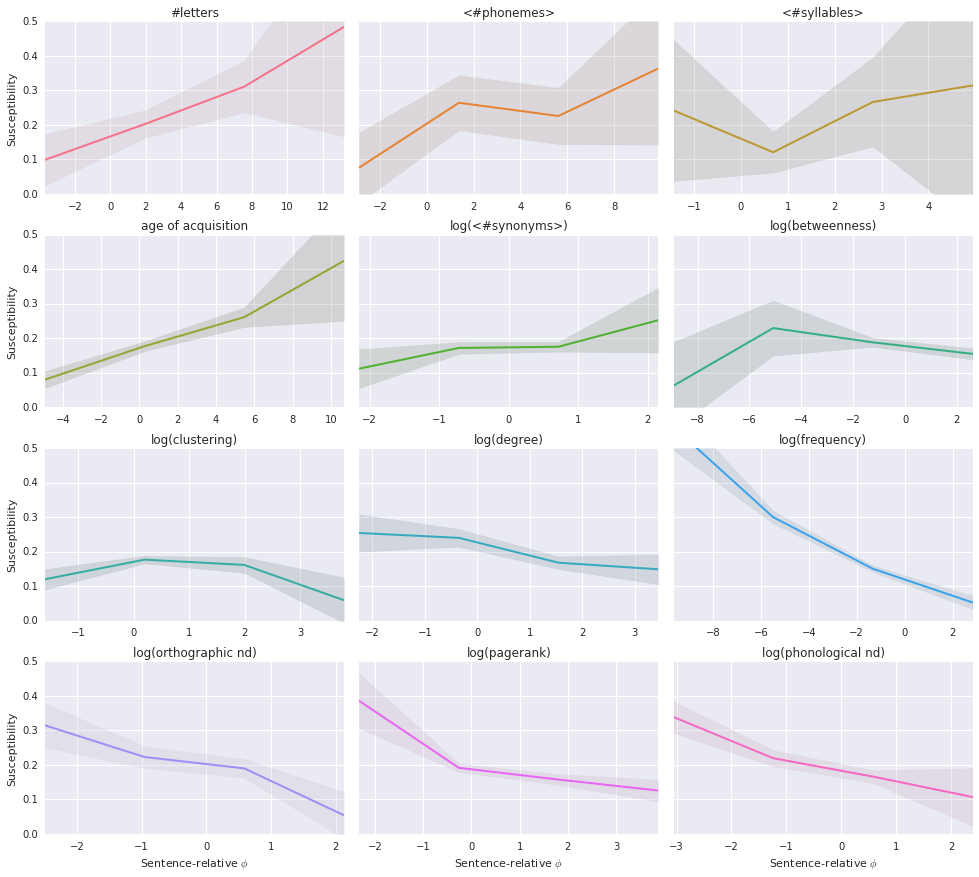

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

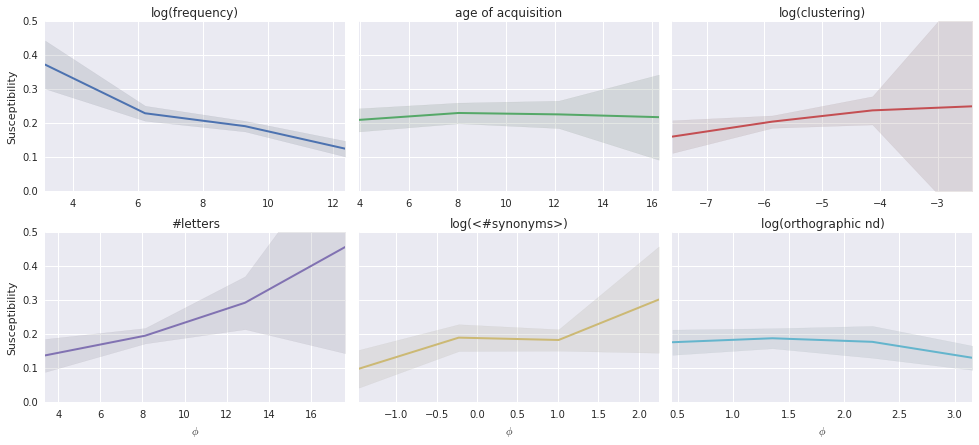

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

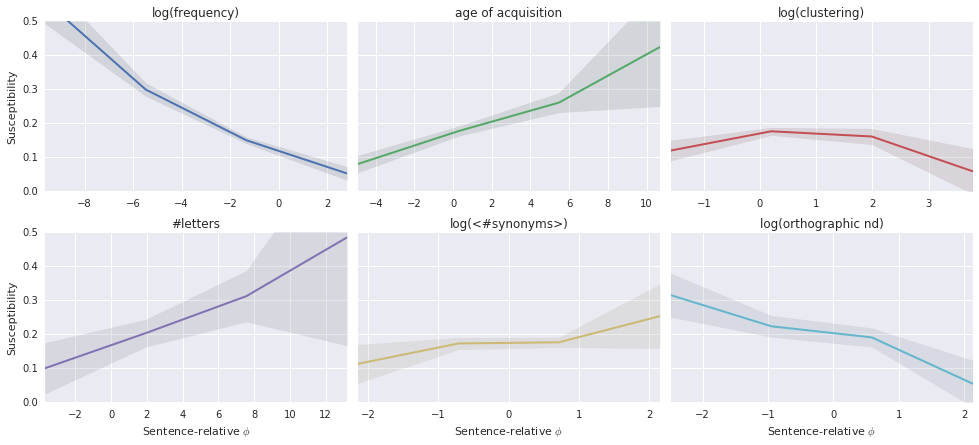

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

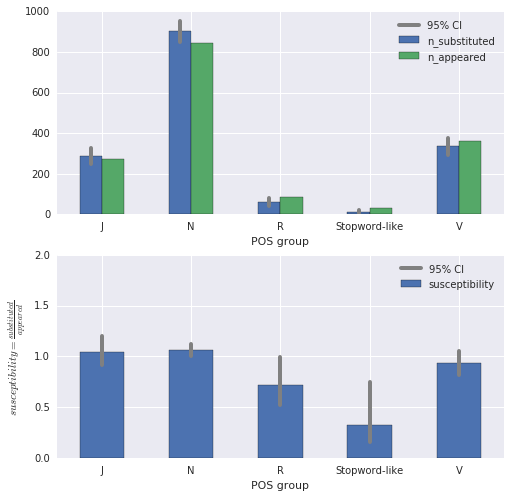

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

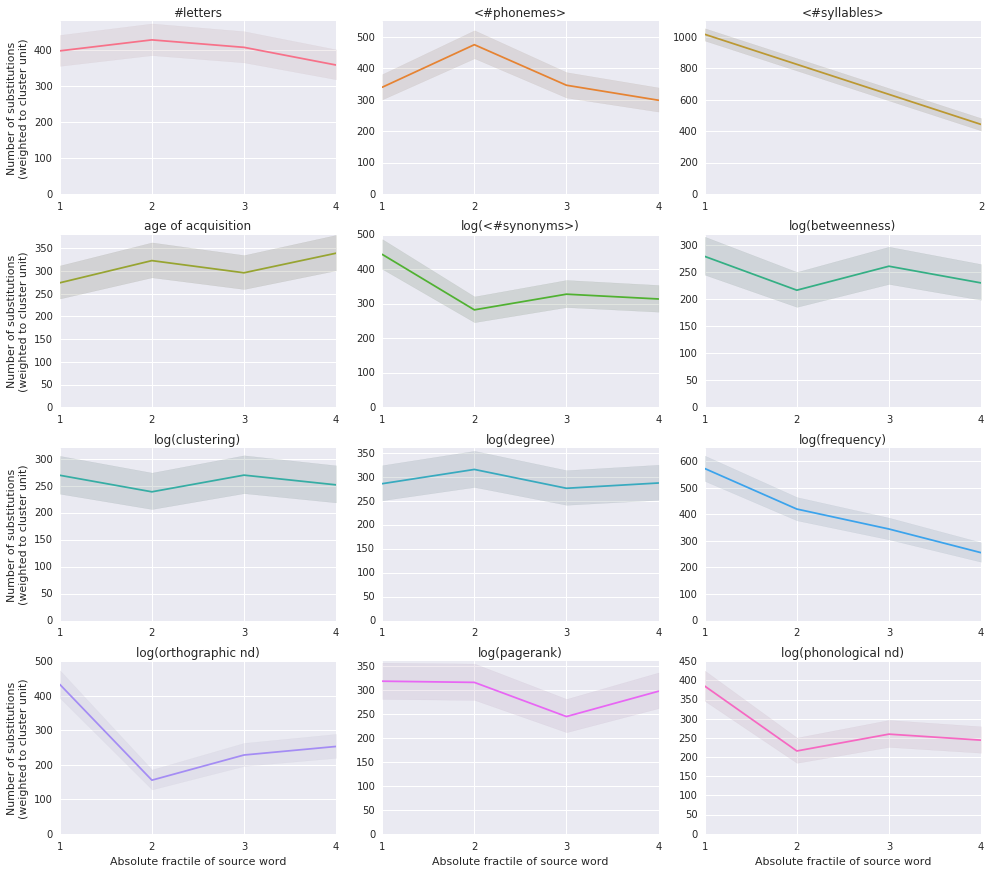

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

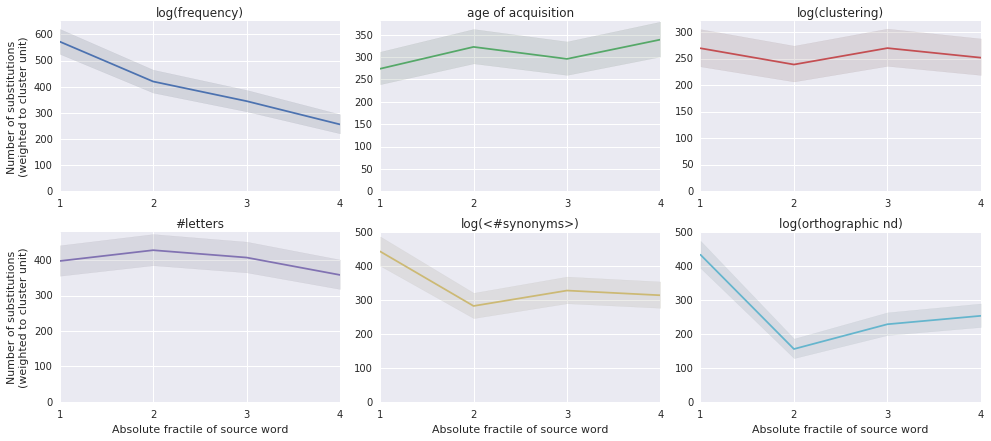

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   89 of 17237) |                    | Elapsed Time: 0:00:01 ETA:  0:03:14

  1% (  180 of 17237) |                    | Elapsed Time: 0:00:02 ETA:  0:03:08

  1% (  216 of 17237) |                    | Elapsed Time: 0:00:02 ETA:  0:03:06

  1% (  292 of 17237) |                    | Elapsed Time: 0:00:03 ETA:  0:03:20

  2% (  374 of 17237) |                    | Elapsed Time: 0:00:04 ETA:  0:03:21

  2% (  431 of 17237) |                    | Elapsed Time: 0:00:05 ETA:  0:03:23

  3% (  518 of 17237) |                    | Elapsed Time: 0:00:06 ETA:  0:03:20

  3% (  622 of 17237) |                    | Elapsed Time: 0:00:07 ETA:  0:03:11

  3% (  647 of 17237) |                    | Elapsed Time: 0:00:07 ETA:  0:03:11

  4% (  728 of 17237) |                    | Elapsed Time: 0:00:08 ETA:  0:03:12

  4% (  800 of 17237) |                    | Elapsed Time: 0:00:09 ETA:  0:03:17

  5% (  862 of 17237) |#                   | Elapsed Time: 0:00:10 ETA:  0:03:21

  5% (  932 of 17237) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:22

  5% ( 1009 of 17237) |#                   | Elapsed Time: 0:00:12 ETA:  0:03:22

  6% ( 1078 of 17237) |#                   | Elapsed Time: 0:00:13 ETA:  0:03:21

  6% ( 1160 of 17237) |#                   | Elapsed Time: 0:00:14 ETA:  0:03:22

  7% ( 1258 of 17237) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:23

  7% ( 1293 of 17237) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:21

  8% ( 1403 of 17237) |#                   | Elapsed Time: 0:00:16 ETA:  0:03:11

  8% ( 1483 of 17237) |#                   | Elapsed Time: 0:00:17 ETA:  0:03:07

  8% ( 1509 of 17237) |#                   | Elapsed Time: 0:00:17 ETA:  0:03:05

  9% ( 1592 of 17237) |#                   | Elapsed Time: 0:00:18 ETA:  0:03:00

  9% ( 1689 of 17237) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:53

 10% ( 1724 of 17237) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:53

 10% ( 1812 of 17237) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:50

 11% ( 1898 of 17237) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:53

 11% ( 1940 of 17237) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:53

 11% ( 2028 of 17237) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:59

 12% ( 2121 of 17237) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:54

 12% ( 2155 of 17237) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:53

 13% ( 2253 of 17237) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:47

 13% ( 2336 of 17237) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:50

 13% ( 2371 of 17237) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:46

 14% ( 2500 of 17237) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:34

 15% ( 2586 of 17237) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:30

 15% ( 2682 of 17237) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:28

 16% ( 2802 of 17237) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:21

 16% ( 2888 of 17237) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:22

 17% ( 2960 of 17237) |###                 | Elapsed Time: 0:00:33 ETA:  0:02:28

 17% ( 3017 of 17237) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:28

 17% ( 3099 of 17237) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:30

 18% ( 3174 of 17237) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:44

 18% ( 3232 of 17237) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:46

 19% ( 3313 of 17237) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:50

 19% ( 3390 of 17237) |###                 | Elapsed Time: 0:00:39 ETA:  0:03:00

 20% ( 3448 of 17237) |####                | Elapsed Time: 0:00:40 ETA:  0:02:59

 20% ( 3527 of 17237) |####                | Elapsed Time: 0:00:41 ETA:  0:03:01

 20% ( 3612 of 17237) |####                | Elapsed Time: 0:00:42 ETA:  0:02:55

 21% ( 3663 of 17237) |####                | Elapsed Time: 0:00:42 ETA:  0:02:50

 21% ( 3741 of 17237) |####                | Elapsed Time: 0:00:43 ETA:  0:02:50

 22% ( 3826 of 17237) |####                | Elapsed Time: 0:00:44 ETA:  0:02:46

 22% ( 3879 of 17237) |####                | Elapsed Time: 0:00:45 ETA:  0:02:43

 23% ( 3978 of 17237) |####                | Elapsed Time: 0:00:46 ETA:  0:02:37

 23% ( 4094 of 17237) |####                | Elapsed Time: 0:00:47 ETA:  0:02:23

 24% ( 4188 of 17237) |####                | Elapsed Time: 0:00:48 ETA:  0:02:18

 24% ( 4272 of 17237) |####                | Elapsed Time: 0:00:49 ETA:  0:02:17

 25% ( 4310 of 17237) |#####               | Elapsed Time: 0:00:49 ETA:  0:02:15

 25% ( 4396 of 17237) |#####               | Elapsed Time: 0:00:50 ETA:  0:02:12

 25% ( 4475 of 17237) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:13

 26% ( 4525 of 17237) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:16

 26% ( 4617 of 17237) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:17

 27% ( 4685 of 17237) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:29

 27% ( 4741 of 17237) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:25

 28% ( 4840 of 17237) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:22

 28% ( 4927 of 17237) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:21

 28% ( 4956 of 17237) |#####               | Elapsed Time: 0:00:57 ETA:  0:02:21

 29% ( 5054 of 17237) |#####               | Elapsed Time: 0:00:58 ETA:  0:02:16

 29% ( 5141 of 17237) |#####               | Elapsed Time: 0:00:59 ETA:  0:02:13

 30% ( 5172 of 17237) |######              | Elapsed Time: 0:00:59 ETA:  0:02:12

 30% ( 5266 of 17237) |######              | Elapsed Time: 0:01:00 ETA:  0:02:10

 30% ( 5292 of 17237) |######              | Elapsed Time: 0:01:01 ETA:  0:02:37

 31% ( 5366 of 17237) |######              | Elapsed Time: 0:01:02 ETA:  0:02:43

 31% ( 5387 of 17237) |######              | Elapsed Time: 0:01:03 ETA:  0:02:51

 31% ( 5485 of 17237) |######              | Elapsed Time: 0:01:04 ETA:  0:02:45

 32% ( 5564 of 17237) |######              | Elapsed Time: 0:01:05 ETA:  0:02:46

 32% ( 5603 of 17237) |######              | Elapsed Time: 0:01:05 ETA:  0:02:53

 33% ( 5690 of 17237) |######              | Elapsed Time: 0:01:06 ETA:  0:02:52

 33% ( 5766 of 17237) |######              | Elapsed Time: 0:01:07 ETA:  0:02:51

 33% ( 5818 of 17237) |######              | Elapsed Time: 0:01:08 ETA:  0:02:55

 34% ( 5906 of 17237) |######              | Elapsed Time: 0:01:09 ETA:  0:02:14

 34% ( 5983 of 17237) |######              | Elapsed Time: 0:01:10 ETA:  0:02:12

 35% ( 6033 of 17237) |#######             | Elapsed Time: 0:01:10 ETA:  0:02:10

 35% ( 6125 of 17237) |#######             | Elapsed Time: 0:01:11 ETA:  0:02:10

 35% ( 6196 of 17237) |#######             | Elapsed Time: 0:01:12 ETA:  0:02:12

 36% ( 6249 of 17237) |#######             | Elapsed Time: 0:01:13 ETA:  0:02:13

 36% ( 6353 of 17237) |#######             | Elapsed Time: 0:01:14 ETA:  0:02:07

 37% ( 6446 of 17237) |#######             | Elapsed Time: 0:01:15 ETA:  0:02:01

 37% ( 6464 of 17237) |#######             | Elapsed Time: 0:01:15 ETA:  0:02:02

 38% ( 6567 of 17237) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:56

 38% ( 6680 of 17237) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:50

 39% ( 6773 of 17237) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:48

 39% ( 6856 of 17237) |#######             | Elapsed Time: 0:01:19 ETA:  0:01:44

 40% ( 6895 of 17237) |########            | Elapsed Time: 0:01:20 ETA:  0:01:43

 40% ( 6980 of 17237) |########            | Elapsed Time: 0:01:21 ETA:  0:01:48

 41% ( 7082 of 17237) |########            | Elapsed Time: 0:01:22 ETA:  0:01:44

 41% ( 7111 of 17237) |########            | Elapsed Time: 0:01:22 ETA:  0:01:45

 41% ( 7197 of 17237) |########            | Elapsed Time: 0:01:23 ETA:  0:01:49

 42% ( 7292 of 17237) |########            | Elapsed Time: 0:01:24 ETA:  0:01:49

 42% ( 7326 of 17237) |########            | Elapsed Time: 0:01:25 ETA:  0:01:48

 42% ( 7405 of 17237) |########            | Elapsed Time: 0:01:26 ETA:  0:01:52

 43% ( 7519 of 17237) |########            | Elapsed Time: 0:01:27 ETA:  0:01:41

 43% ( 7542 of 17237) |########            | Elapsed Time: 0:01:27 ETA:  0:01:38

 44% ( 7637 of 17237) |########            | Elapsed Time: 0:01:28 ETA:  0:01:34

 44% ( 7714 of 17237) |########            | Elapsed Time: 0:01:29 ETA:  0:01:40

 45% ( 7757 of 17237) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:39

 45% ( 7848 of 17237) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:36

 46% ( 7942 of 17237) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:35

 46% ( 7973 of 17237) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:34

 46% ( 8068 of 17237) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:29

 47% ( 8154 of 17237) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:36

 47% ( 8188 of 17237) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:38

 48% ( 8274 of 17237) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:39

 48% ( 8362 of 17237) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:35

 48% ( 8404 of 17237) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:32

 49% ( 8504 of 17237) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:29

 49% ( 8589 of 17237) |#########           | Elapsed Time: 0:01:38 ETA:  0:01:30

 50% ( 8619 of 17237) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:32

 50% ( 8718 of 17237) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:30

 50% ( 8790 of 17237) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:33

 51% ( 8834 of 17237) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:34

 51% ( 8916 of 17237) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:34

 52% ( 9008 of 17237) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:32

 52% ( 9050 of 17237) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:33

 52% ( 9128 of 17237) |##########          | Elapsed Time: 0:01:45 ETA:  0:01:39

 53% ( 9225 of 17237) |##########          | Elapsed Time: 0:01:46 ETA:  0:01:34

 53% ( 9265 of 17237) |##########          | Elapsed Time: 0:01:46 ETA:  0:01:32

 54% ( 9347 of 17237) |##########          | Elapsed Time: 0:01:47 ETA:  0:01:36

 54% ( 9428 of 17237) |##########          | Elapsed Time: 0:01:48 ETA:  0:01:32

 55% ( 9481 of 17237) |###########         | Elapsed Time: 0:01:49 ETA:  0:01:28

 55% ( 9580 of 17237) |###########         | Elapsed Time: 0:01:50 ETA:  0:01:22

 56% ( 9654 of 17237) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:26

 56% ( 9696 of 17237) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:28

 56% ( 9780 of 17237) |###########         | Elapsed Time: 0:01:52 ETA:  0:01:26

 57% ( 9864 of 17237) |###########         | Elapsed Time: 0:01:53 ETA:  0:01:29

 57% ( 9912 of 17237) |###########         | Elapsed Time: 0:01:54 ETA:  0:01:24

 58% (10005 of 17237) |###########         | Elapsed Time: 0:01:55 ETA:  0:01:20

 58% (10085 of 17237) |###########         | Elapsed Time: 0:01:56 ETA:  0:01:19

 58% (10127 of 17237) |###########         | Elapsed Time: 0:01:56 ETA:  0:01:23

 59% (10208 of 17237) |###########         | Elapsed Time: 0:01:57 ETA:  0:01:28

 59% (10308 of 17237) |###########         | Elapsed Time: 0:01:58 ETA:  0:01:19

 60% (10343 of 17237) |############        | Elapsed Time: 0:01:59 ETA:  0:01:21

 60% (10435 of 17237) |############        | Elapsed Time: 0:02:00 ETA:  0:01:18

 61% (10519 of 17237) |############        | Elapsed Time: 0:02:01 ETA:  0:01:17

 61% (10558 of 17237) |############        | Elapsed Time: 0:02:01 ETA:  0:01:21

 61% (10643 of 17237) |############        | Elapsed Time: 0:02:02 ETA:  0:01:22

 62% (10715 of 17237) |############        | Elapsed Time: 0:02:03 ETA:  0:01:24

 62% (10774 of 17237) |############        | Elapsed Time: 0:02:04 ETA:  0:01:16

 63% (10861 of 17237) |############        | Elapsed Time: 0:02:05 ETA:  0:01:13

 63% (10950 of 17237) |############        | Elapsed Time: 0:02:06 ETA:  0:01:16

 63% (10989 of 17237) |############        | Elapsed Time: 0:02:06 ETA:  0:01:13

 64% (11083 of 17237) |############        | Elapsed Time: 0:02:07 ETA:  0:01:11

 64% (11182 of 17237) |############        | Elapsed Time: 0:02:08 ETA:  0:01:06

 65% (11205 of 17237) |#############       | Elapsed Time: 0:02:09 ETA:  0:01:06

 65% (11270 of 17237) |#############       | Elapsed Time: 0:02:10 ETA:  0:01:11

 65% (11340 of 17237) |#############       | Elapsed Time: 0:02:11 ETA:  0:01:11

 66% (11420 of 17237) |#############       | Elapsed Time: 0:02:12 ETA:  0:01:13

 66% (11512 of 17237) |#############       | Elapsed Time: 0:02:13 ETA:  0:01:10

 67% (11600 of 17237) |#############       | Elapsed Time: 0:02:14 ETA:  0:01:09

 67% (11635 of 17237) |#############       | Elapsed Time: 0:02:14 ETA:  0:01:08

 68% (11739 of 17237) |#############       | Elapsed Time: 0:02:15 ETA:  0:01:04

 68% (11831 of 17237) |#############       | Elapsed Time: 0:02:16 ETA:  0:01:05

 68% (11851 of 17237) |#############       | Elapsed Time: 0:02:16 ETA:  0:01:04

 69% (11930 of 17237) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:59

 69% (12019 of 17237) |#############       | Elapsed Time: 0:02:18 ETA:  0:00:52

 70% (12066 of 17237) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:54

 70% (12155 of 17237) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:54

 71% (12246 of 17237) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:52

 71% (12282 of 17237) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:50

 71% (12383 of 17237) |##############      | Elapsed Time: 0:02:22 ETA:  0:00:50

 72% (12457 of 17237) |##############      | Elapsed Time: 0:02:23 ETA:  0:00:54

 72% (12497 of 17237) |##############      | Elapsed Time: 0:02:24 ETA:  0:00:53

 73% (12586 of 17237) |##############      | Elapsed Time: 0:02:25 ETA:  0:00:49

 73% (12683 of 17237) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:46

 73% (12713 of 17237) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:42

 74% (12842 of 17237) |##############      | Elapsed Time: 0:02:27 ETA:  0:00:30

 75% (12928 of 17237) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:32

 75% (13024 of 17237) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:32

 76% (13120 of 17237) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:25

 76% (13144 of 17237) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:23

 76% (13252 of 17237) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:17

 77% (13359 of 17237) |###############     | Elapsed Time: 0:02:32 ETA:  0:00:14

 77% (13365 of 17237) |###############     | Elapsed Time: 0:02:33 ETA:  0:00:45

 78% (13467 of 17237) |###############     | Elapsed Time: 0:02:34 ETA:  0:00:53

 78% (13575 of 17237) |###############     | Elapsed Time: 0:02:36 ETA:  0:00:45

 79% (13662 of 17237) |###############     | Elapsed Time: 0:02:37 ETA:  0:00:47

 79% (13751 of 17237) |###############     | Elapsed Time: 0:02:38 ETA:  0:00:48

 80% (13790 of 17237) |################    | Elapsed Time: 0:02:38 ETA:  0:00:48

 80% (13890 of 17237) |################    | Elapsed Time: 0:02:39 ETA:  0:00:50

 81% (14006 of 17237) |################    | Elapsed Time: 0:02:40 ETA:  0:00:15

 81% (14107 of 17237) |################    | Elapsed Time: 0:02:41 ETA:  0:00:14

 82% (14199 of 17237) |################    | Elapsed Time: 0:02:42 ETA:  0:00:17

 82% (14221 of 17237) |################    | Elapsed Time: 0:02:42 ETA:  0:00:16

 83% (14319 of 17237) |################    | Elapsed Time: 0:02:43 ETA:  0:00:12

 83% (14436 of 17237) |################    | Elapsed Time: 0:02:44 ETA:  0:00:07

 84% (14539 of 17237) |################    | Elapsed Time: 0:02:45 ETA:  0:00:05

 84% (14628 of 17237) |################    | Elapsed Time: 0:02:46 ETA:  0:00:10

 85% (14652 of 17237) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:12

 85% (14747 of 17237) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:13

 86% (14867 of 17237) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:08

 86% (14970 of 17237) |#################   | Elapsed Time: 0:02:50 ETA:  0:00:06

 87% (15083 of 17237) |#################   | Elapsed Time: 0:02:51 ETA:  0:00:05

 88% (15195 of 17237) |#################   | Elapsed Time: 0:02:52 ETA:  0:00:02

 88% (15298 of 17237) |#################   | Elapsed Time: 0:02:53 ETA:  0:00:00

 89% (15386 of 17237) |#################   | Elapsed Time: 0:02:54 ETA:  0:00:00

 90% (15514 of 17237) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:00

 90% (15609 of 17237) |##################  | Elapsed Time: 0:02:56 ETA:  0:00:00

 91% (15729 of 17237) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:00

 91% (15831 of 17237) |##################  | Elapsed Time: 0:02:58 ETA:  0:00:00

 92% (15945 of 17237) |##################  | Elapsed Time: 0:02:59 ETA:  0:00:00

 93% (16048 of 17237) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:00

 93% (16160 of 17237) |##################  | Elapsed Time: 0:03:01 ETA:  0:00:00

 94% (16250 of 17237) |##################  | Elapsed Time: 0:03:02 ETA:  0:00:00

 94% (16348 of 17237) |##################  | Elapsed Time: 0:03:03 ETA:  0:00:00

 95% (16376 of 17237) |################### | Elapsed Time: 0:03:04 ETA:  0:00:00

 95% (16467 of 17237) |################### | Elapsed Time: 0:03:05 ETA:  0:00:00

 96% (16573 of 17237) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 96% (16591 of 17237) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 96% (16695 of 17237) |################### | Elapsed Time: 0:03:07 ETA:  0:00:00

 97% (16807 of 17237) |################### | Elapsed Time: 0:03:08 ETA:  0:00:00

 98% (16893 of 17237) |################### | Elapsed Time: 0:03:09 ETA:  0:00:00

 98% (16976 of 17237) |################### | Elapsed Time: 0:03:10 ETA:  0:00:00

 98% (17022 of 17237) |################### | Elapsed Time: 0:03:11 ETA:  0:00:00

 99% (17122 of 17237) |################### | Elapsed Time: 0:03:12 ETA:  0:00:00

100% (17237 of 17237) |####################| Elapsed Time: 0:03:13 Time: 0:03:13


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

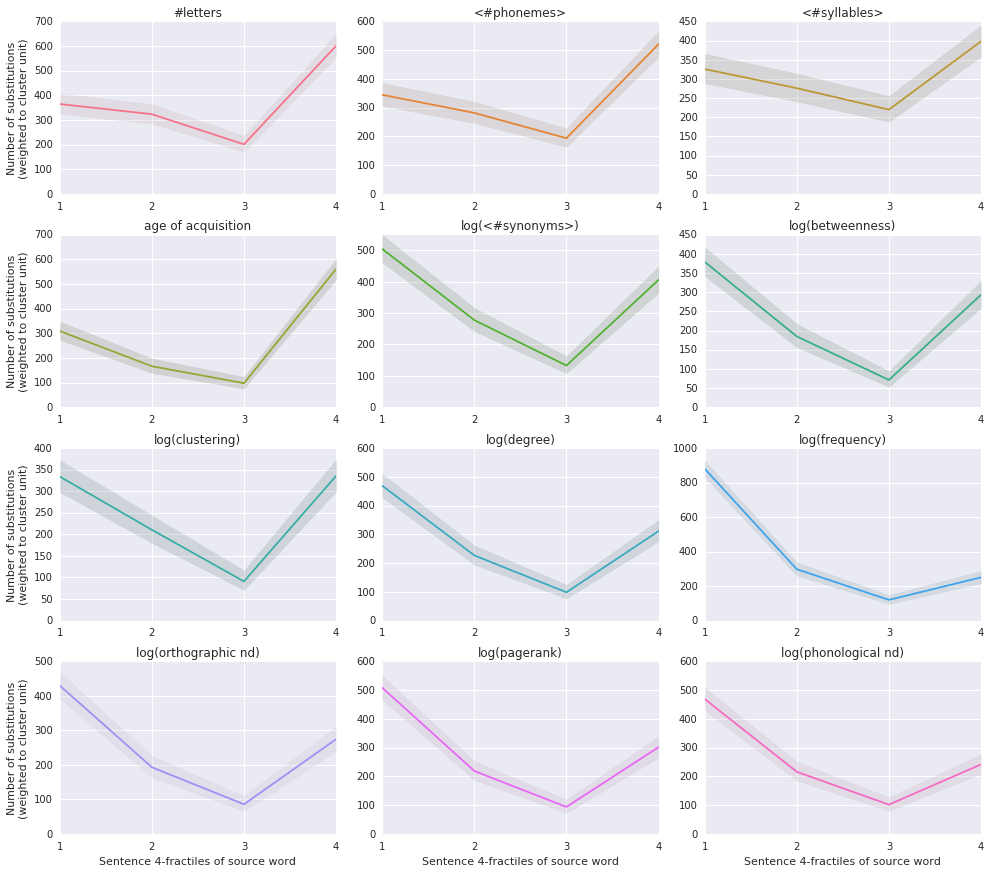

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

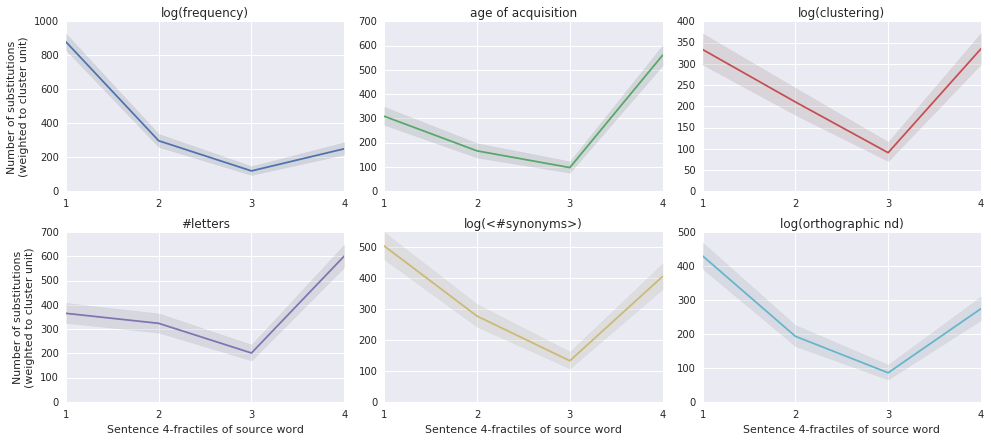

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)